In [1]:
import numpy as np
from numpy.linalg import inv
from scipy.interpolate import interp1d


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5),
             'figure.dpi': 80})

In [2]:
def rmse_spline(x, y, f):
    '''
    x - new x values
    y - new y values
    f - interpolation function
    '''
    yhat = f(x)
    rmse = np.sqrt(np.mean(  (yhat - y)**2  ))
    return rmse

def rmse_ols(x, y, beta):
    '''
    x - new x values
    y - new y values
    beta - coefficient vector from regression
    '''
    yhat = beta[0] + beta[1]*x
    rmse = np.sqrt(np.mean(  (yhat - y)**2  ))
    return rmse

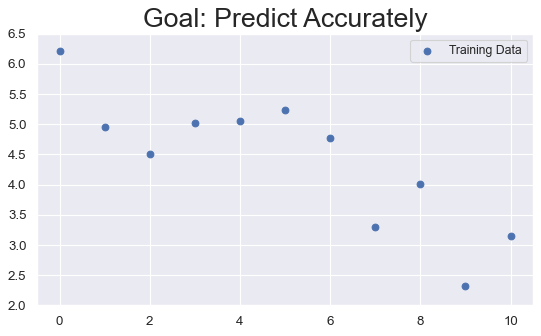

In [3]:
np.random.seed(490)

b0 = 6
b1 = -1/3
x1 = np.arange(0, 11)
y1 = b0 + b1*x1 + np.random.uniform(low = -1, size = len(x1))

plt.scatter(x1, y1, label = 'Training Data')

plt.title('Goal: Predict Accurately')
plt.ylim([2, 6.5])
plt.legend()
plt.savefig('goal', dpi = 160)

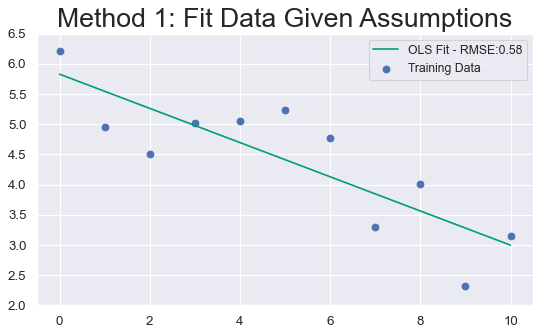

In [4]:
X = np.array([np.ones(11), x1]).T
beta = inv(X.T@X)@X.T@y1

plt.scatter(x1, y1, label = 'Training Data')
plt.plot([0, 10], [beta[0], beta[0] + 10*beta[1]], color = '#009E73', label = 'OLS Fit - RMSE:{0:.2f}'.format(rmse_ols(x1, y1, beta)))

plt.title('Method 1: Fit Data Given Assumptions')
plt.ylim([2, 6.5])
plt.legend()
plt.savefig('method 1', dpi = 160)

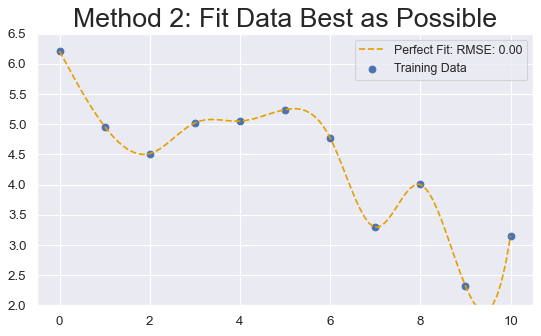

In [5]:
f2 = interp1d(x1, y1, kind = 'cubic')
x2 = np.linspace(0, 10, num = 100, endpoint = True)

plt.scatter(x1, y1, label = 'Training Data')
plt.plot(x2, f2(x2), color = '#E69F00', linestyle = 'dashed', label = 'Perfect Fit: RMSE: {0:.2f}'.format(rmse_spline(x1, y1, f2)))

plt.title('Method 2: Fit Data Best as Possible')
plt.ylim([2, 6.5])
plt.legend()
plt.savefig('method 2', dpi = 160)

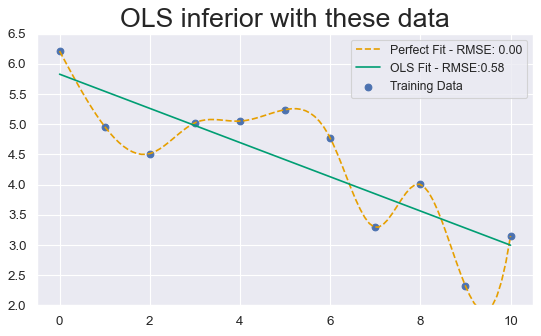

In [6]:
X = np.array([np.ones(11), x1]).T
beta = inv(X.T@X)@X.T@y1

plt.scatter(x1, y1, label = 'Training Data')
plt.plot(x2, f2(x2), color = '#E69F00', linestyle = 'dashed', label = 'Perfect Fit - RMSE: {0:.2f}'.format(rmse_spline(x1, y1, f2)))
plt.plot([0, 10], [beta[0], beta[0] + 10*beta[1]], color = '#009E73', label = 'OLS Fit - RMSE:{0:.2f}'.format(rmse_ols(x1, y1, beta)))

plt.title('OLS inferior with these data')
plt.ylim([2, 6.5])
plt.legend()
plt.savefig('comparison', dpi = 160)

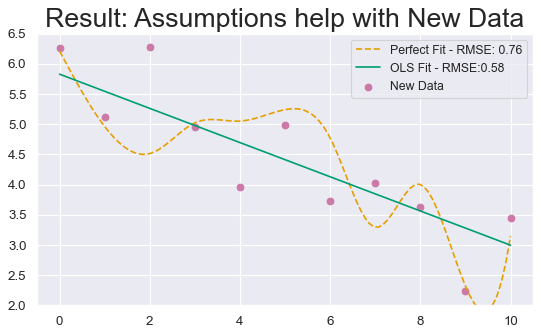

In [7]:
y2 = b0 + b1*x1 + np.random.uniform(low = -1, size = len(x1))
plt.scatter(x1, y2, color = '#CC79A7', label = 'New Data')
plt.plot(x2, f2(x2), color = '#E69F00', linestyle = 'dashed', label = 'Perfect Fit - RMSE: {0:.2f}'.format(rmse_spline(x1, y2, f2)))
plt.plot([0, 10], [beta[0], beta[0] + 10*beta[1]], color = '#009E73', label = 'OLS Fit - RMSE:{0:.2f}'.format(rmse_ols(x1, y2, beta)))

plt.title('Result: Assumptions help with New Data')
plt.ylim([2, 6.5])
plt.legend()
plt.savefig('result', dpi = 160)